# SD212: Graph mining
## Lab 4: PageRank

In this lab, you will learn how to compute, use and interpret various PageRank metrics.

## Import

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
from scipy import sparse as sp

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt

**Note:** The following magic command provides interactive plots (e.g., for zooming in/out).<br>
Any new figure must by declared by the command ```plt.figure()```

In [6]:
# %matplotlib inline
%matplotlib notebook

## Data

You will need the following datasets (the same as in previous labs, no need to download them again):
* [Les Misérables](http://perso.telecom-paristech.fr/~bonald/graphs/miserables.graphml.gz)<br>  Graph connecting the characters of the [novel of Victor Hugo](https://fr.wikisource.org/wiki/Les_Misérables) when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together. 
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools)
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).



## 1. PageRank

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution uniform over the set of nodes.

## Toy graph

Consider the following graph:

## To do

* Guess the best ranked node of this graph.
* Check the PageRank of each node using the```pagerank``` function of ```networkx``` and interpret the results.
* Add edges 2->5 and 6->3 and observe the impact on the top-3 nodes.


<IPython.core.display.Javascript object>


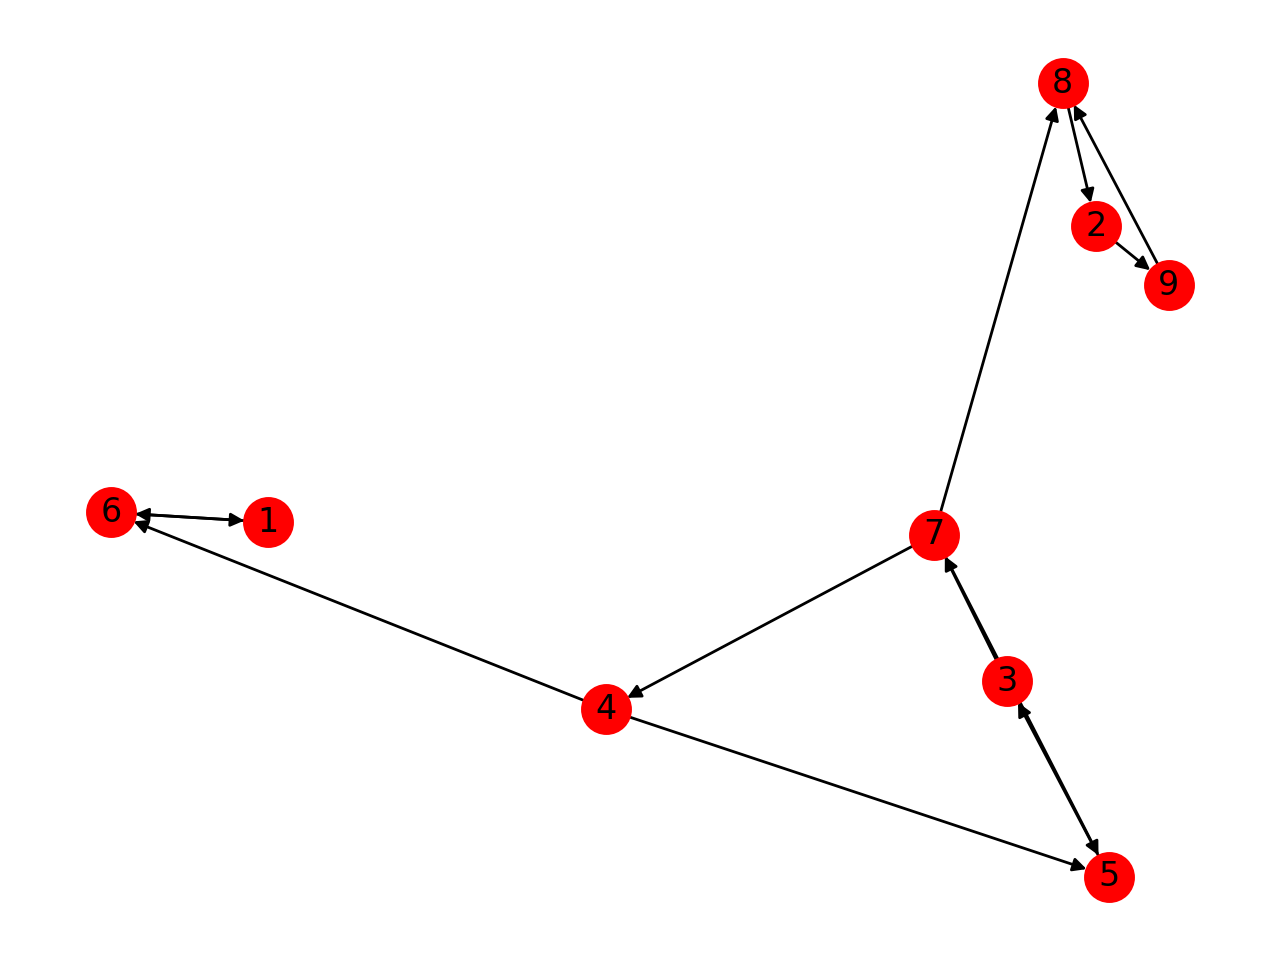

[(4, 0.03586490754882651), (5, 0.051107493258563), (3, 0.06010803594124311), (7, 0.06775849722262378), (9, 0.1470581226968908), (2, 0.15340048063270742), (1, 0.15780138634030672), (8, 0.16086300246509883), (6, 0.1660380738937397)]


<IPython.core.display.Javascript object>


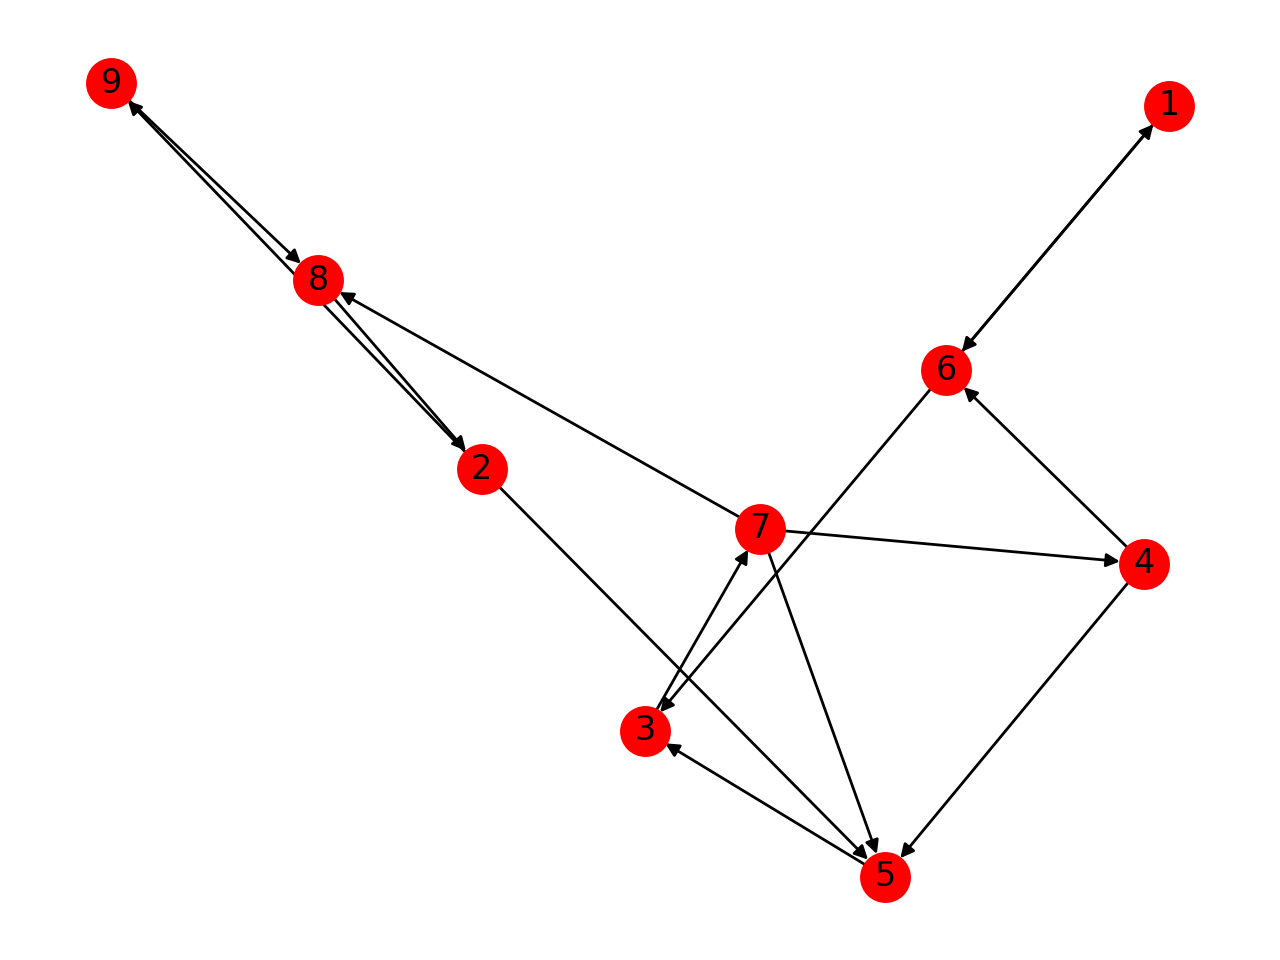

[(1, 0.055177090077234855), (4, 0.063636150728414), (9, 0.06744956317842467), (6, 0.09061278609150875), (2, 0.11949146088380552), (8, 0.1209687215133555), (5, 0.1414647348577573), (7, 0.16577642307830376), (3, 0.1754230695911956)]


In [7]:
# Best Ranked Node : 8

toy_graph = nx.DiGraph()
edgelist = [(7,5),(5,3),(3,7),(4,5),(4,6),(7,4),(1,6),(9,8),(7,8),(6,1),(2,9),(8,2)]
toy_graph.add_edges_from(edgelist)

plt.figure()
nx.draw(toy_graph, with_labels = True)

print(sorted(nx.pagerank(alpha=0.85, G=toy_graph).items(), key=lambda kv: kv[1])) # ==> max 6, top 3 : 6,8,9

toy_graph.add_edges_from([(2,5), (6,3)])
plt.figure()
nx.draw(toy_graph, with_labels = True)

print(sorted(nx.pagerank(alpha=0.85, G=toy_graph).items(), key=lambda kv: kv[1]))



## Path graph

Now consider a path graph:

In [8]:
n = 10
path_graph = nx.path_graph(n)
pos = [(i,0) for i in range(n)]

<IPython.core.display.Javascript object>


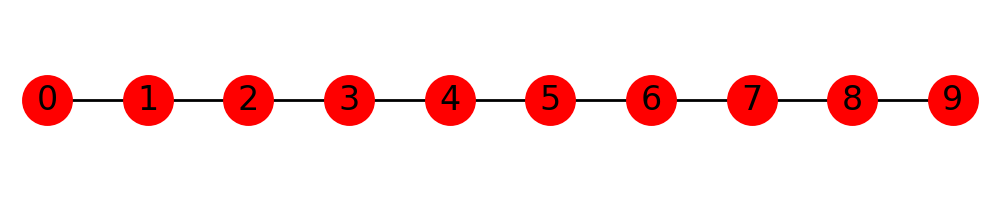

In [9]:
plt.figure(figsize=(5,1))
nx.draw(path_graph,pos,with_labels = True)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$?

In [10]:
print(sorted(nx.pagerank(alpha=0.95, G=path_graph).items(), key=lambda kv: kv[1])[:2])
print(sorted(nx.pagerank(alpha=0.85, G=path_graph).items(), key=lambda kv: kv[1])[:2])
print(sorted(nx.pagerank(alpha=0.70, G=path_graph).items(), key=lambda kv: kv[1])[:2])

[(0, 0.05893198234174822), (9, 0.05893198234174822)]
[(9, 0.06438475238742991), (0, 0.06438475238742992)]
[(0, 0.07101721609298264), (9, 0.07101721609298264)]


In [11]:
import traceback

try:
    print(nx.pagerank(alpha=1, G=path_graph))
except Exception:
     traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-11-4dda36c6d47a>", line 4, in <module>
    print(nx.pagerank(alpha=1, G=path_graph))
  File "<decorator-gen-400>", line 2, in pagerank
  File "/Users/maximelhoustau/anaconda3/lib/python3.6/site-packages/networkx/utils/decorators.py", line 82, in _not_implemented_for
    return not_implement_for_func(*args, **kwargs)
  File "/Users/maximelhoustau/anaconda3/lib/python3.6/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py", line 158, in pagerank
    raise nx.PowerIterationFailedConvergence(max_iter)
networkx.exception.PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')


## Les Misérables


In [12]:
miserables = nx.read_graphml("miserables.graphml", node_type = int)

In [13]:
names = nx.get_node_attributes(miserables, 'name')
weights = nx.get_edge_attributes(miserables, 'weight')
width = [weights[e] / 2 for e in miserables.edges()]

<IPython.core.display.Javascript object>


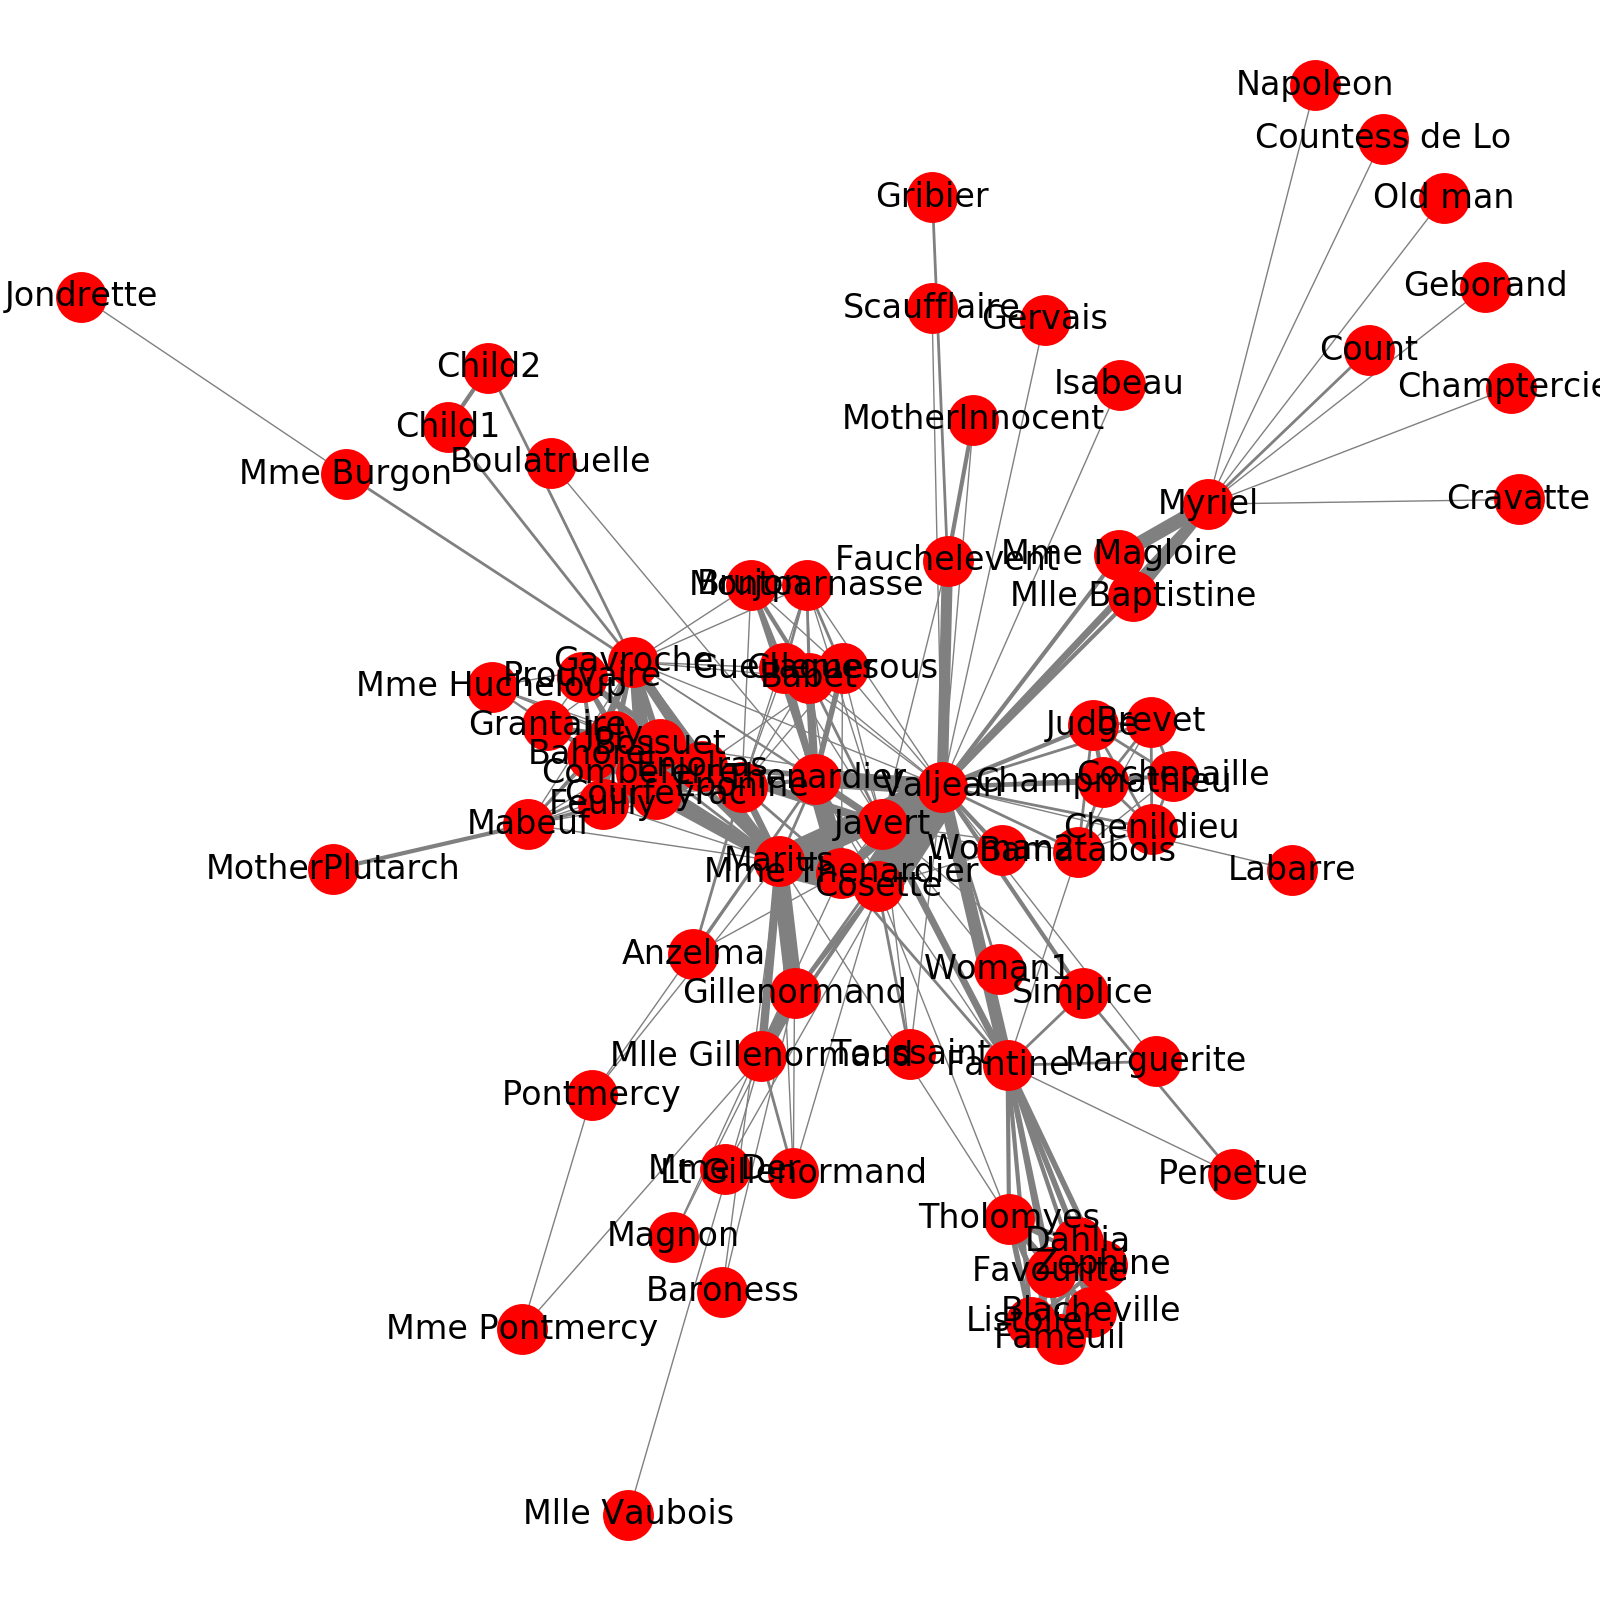

In [14]:
plt.figure(figsize = (8,8))
nx.draw(miserables, labels = names, width = width, edge_color = 'grey')

## To do

* List the 10 best ranked nodes of Les Misérables.
* Compare with the 10 nodes of highest degrees and the 10 nodes of highest weights.
# * Try different values of $\alpha$ and interpret the results.

In [15]:
def best_ranked_nodes(graph, alpha, n=10):
    return [tuple[0] for tuple in (sorted(nx.pagerank(alpha=alpha, G=graph).items(), key=lambda kv: kv[1])[:-n:-1])]

def best_ranked_names(graph, alpha, n=10):
    graph_best_ranked_nodes = best_ranked_nodes(graph,alpha,n)
    names = nx.get_node_attributes(graph, 'name')
    graph_best_ranked_names = list(np.array([kv[1] for kv in names.items()])[graph_best_ranked_nodes])
    return graph_best_ranked_names
    
def highest_degrees_nodes(graph, n=10, direction=None):
    if direction == None:
        degrees = graph.degree
    elif direction == 'in':
        degrees = graph.in_degree
    elif direction == 'out':
        degrees = graph.out_degree
    else:
        degrees = graph.degree
    return [tuple[0] for tuple in (sorted(degrees, key=lambda kv: kv[1])[:-n:-1])]

def highest_degrees_names(graph, n=10, direction=None):
    graph_highest_degrees_nodes = highest_degrees_nodes(graph,n, direction)
    names = nx.get_node_attributes(graph, 'name')
    graph_best_degrees_names = list(np.array([kv[1] for kv in names.items()])[graph_highest_degrees_nodes])
    return graph_best_degrees_names

def highest_weights_nodes(graph, n=10):
    weights = nx.get_edge_attributes(graph, 'weight')
    edges = [tuple for tuple in (sorted(weights, key=lambda kv: kv[1])[:-n:-1])]
    nodes = []
    for edge in edges:
        if edge[0] not in nodes:
            nodes.append(edge[0])
        elif edge[1] not in nodes:
            nodes.append(edge[1])
    return nodes

def list_intersection(list1, list2):
    return list(set(list1).intersection(list2))

def closest_node_to(graph, node_name, n_node):
    names = nx.get_node_attributes(graph, 'name')
    node_index = [kv[1] for kv in names.items()].index(node_name)
    if node_index == -1 :
        raise Exception(node_name + " not in graph")
    top_node = [tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.85, G=graph, personalization={node_index:1}).items(), key=lambda kv: kv[1])[:-n_node-1:-1])]
    return list(np.array([kv[1] for kv in names.items()])[top_node])

In [16]:
#PageRank
miserable_best_ranked_nodes = best_ranked_nodes(miserables, 0.85, 10)
print(miserable_best_ranked_nodes)

[11, 55, 0, 26, 58, 25, 62, 48, 23]


In [18]:
best_ranked_names(miserables, 0.85, 10)

['Valjean',
 'Marius',
 'Myriel',
 'Cosette',
 'Enjolras',
 'Thenardier',
 'Courfeyrac',
 'Gavroche',
 'Fantine']

In [19]:
miserable_highest_degrees_nodes = highest_degrees_nodes(miserables, 10)
print(miserable_highest_degrees_nodes)

[11, 48, 55, 27, 25, 58, 23, 64, 62]


In [20]:
miserable_highest_weights_nodes = highest_weights_nodes(miserables, 10)
print(miserable_highest_weights_nodes)

[66, 65, 64, 63, 62, 58, 48, 71, 70]


In [21]:
list_intersection(miserable_best_ranked_nodes, miserable_highest_degrees_nodes)

[11, 48, 23, 55, 25, 58, 62]

In [22]:
list_intersection(miserable_best_ranked_nodes, miserable_highest_weights_nodes)

[48, 58, 62]

In [23]:
print([tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.85, G=miserables).items(), key=lambda kv: kv[1])[:-10:-1])])

[11, 55, 0, 26, 58, 25, 62, 48, 23]


In [24]:
print([tuple[0] for tuple in (sorted(miserables.degree, key=lambda kv: kv[1])[:-10:-1])])

[11, 48, 55, 27, 25, 58, 23, 64, 62]


In [25]:
print([tuple for tuple in (sorted(weights, key=lambda kv: kv[1])[:-10:-1])])

[(66, 76), (65, 76), (64, 76), (63, 76), (62, 76), (58, 76), (48, 76), (71, 75), (70, 75)]


In [26]:
print([tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.95, G=miserables).items(), key=lambda kv: kv[1])[:-10:-1])])

[11, 55, 58, 62, 26, 25, 59, 64, 48]


In [27]:
print([tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.85, G=miserables).items(), key=lambda kv: kv[1])[:-10:-1])])

[11, 55, 0, 26, 58, 25, 62, 48, 23]


## Openflights


In [28]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)
names_flight = nx.get_node_attributes(openflights, 'name')

In [29]:
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights}

<IPython.core.display.Javascript object>


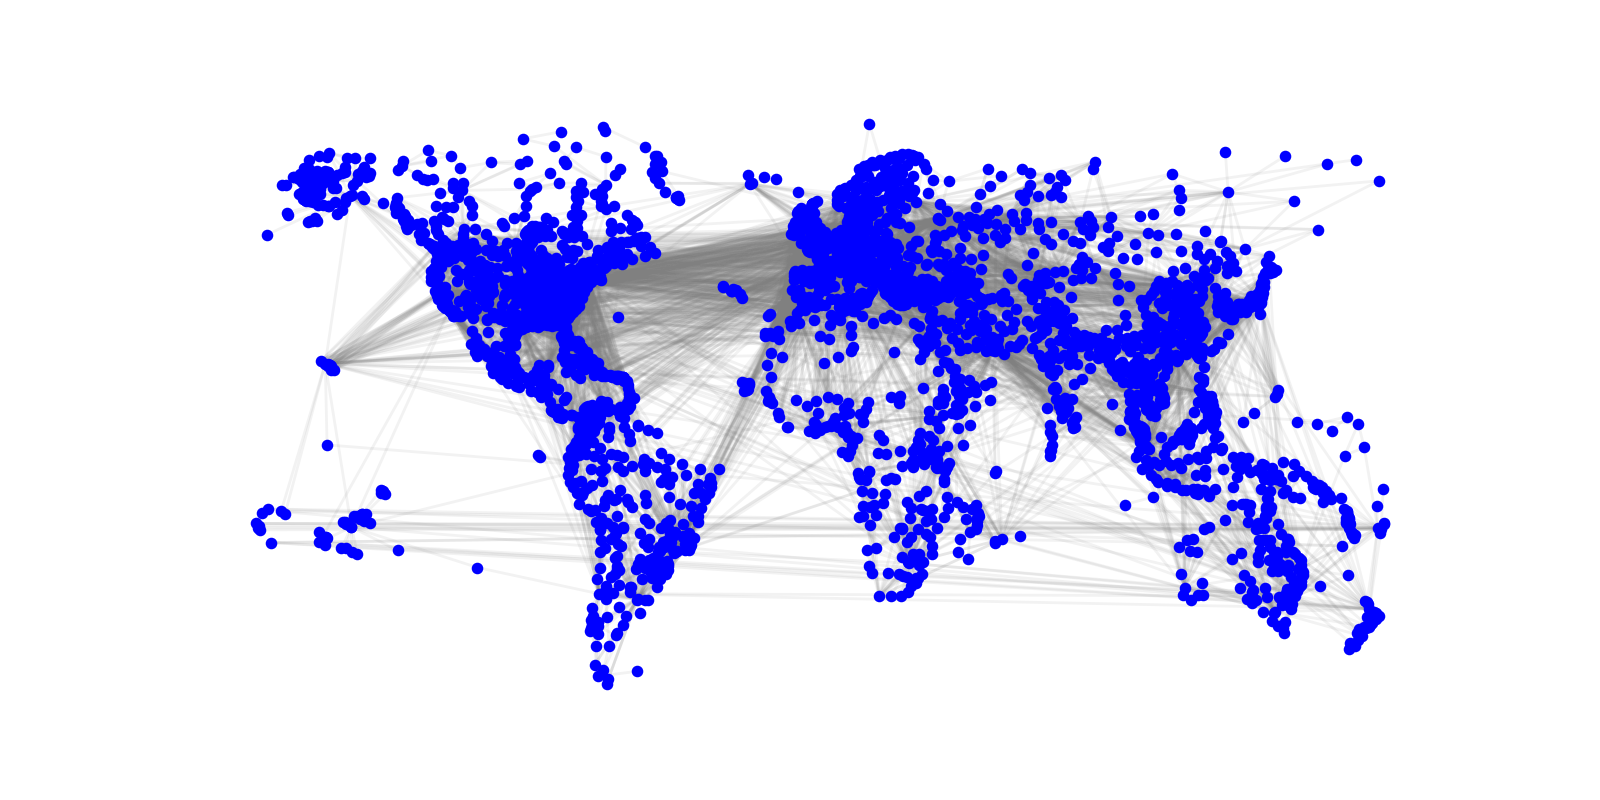

In [30]:
plt.figure(figsize=(8,4))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_edges(openflights, pos, alpha = .1, edge_color = 'grey')
plt.show()

## To do

* List and display the 10 best ranked airports.
* Compare with the 10 airports of highest traffic.

In [31]:
openflight_best_ranked_nodes = best_ranked_nodes(graph=openflights, alpha=0.85, n=10)
print(openflight_best_ranked_nodes)

[1782, 1773, 280, 1857, 1825, 622, 762, 379, 1688]


In [32]:
top_node = [tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.85, G=openflights).items(), key=lambda kv: kv[1])[:-10:-1])]
top_node

[1782, 1773, 280, 1857, 1825, 622, 762, 379, 1688]

In [33]:
openflight_best_ranked_names = best_ranked_names(openflights, 0.85, 10)
openflight_best_ranked_names

['Hartsfield Jackson Atlanta International Airport',
 'Dallas Fort Worth International Airport',
 'Amsterdam Airport Schiphol',
 "Chicago O'Hare International Airport",
 'Denver International Airport',
 'Charles de Gaulle International Airport',
 'Atatürk International Airport',
 'OR Tambo International Airport',
 'Los Angeles International Airport']

In [34]:
top_ranked = np.array([kv[1] for kv in names_flight.items()])[top_node]
top_ranked

array(['Hartsfield Jackson Atlanta International Airport',
       'Dallas Fort Worth International Airport',
       'Amsterdam Airport Schiphol',
       "Chicago O'Hare International Airport",
       'Denver International Airport',
       'Charles de Gaulle International Airport',
       'Atatürk International Airport', 'OR Tambo International Airport',
       'Los Angeles International Airport'], dtype='<U65')

In [35]:
openflight_highest_degrees_names = highest_degrees_names(openflights, 10)
openflight_highest_degrees_names

['Frankfurt am Main International Airport',
 'Charles de Gaulle International Airport',
 'Amsterdam Airport Schiphol',
 'Atatürk International Airport',
 'Hartsfield Jackson Atlanta International Airport',
 "Chicago O'Hare International Airport",
 'Beijing Capital International Airport',
 'Munich International Airport',
 'Domodedovo International Airport']

In [36]:
top_degree = np.array([kv[1] for kv in names_flight.items()])[[tuple[0] for tuple in (sorted(openflights.degree, key=lambda kv: kv[1])[:-10:-1])]]
top_degree

array(['Frankfurt am Main International Airport',
       'Charles de Gaulle International Airport',
       'Amsterdam Airport Schiphol', 'Atatürk International Airport',
       'Hartsfield Jackson Atlanta International Airport',
       "Chicago O'Hare International Airport",
       'Beijing Capital International Airport',
       'Munich International Airport', 'Domodedovo International Airport'],
      dtype='<U65')

In [37]:
list_intersection(openflight_best_ranked_names, openflight_highest_degrees_names)

['Charles de Gaulle International Airport',
 "Chicago O'Hare International Airport",
 'Amsterdam Airport Schiphol',
 'Atatürk International Airport',
 'Hartsfield Jackson Atlanta International Airport']

In [38]:
print(np.sum([1 if airport in top_degree else 0 for airport in top_ranked ]))

5


## Wikipedia for Schools

In [39]:
wikipedia = nx.read_graphml("wikipedia_schools.graphml", node_type = int)
names_wiki = nx.get_node_attributes(wikipedia, 'name')
nx.info(wikipedia)

'Name: \nType: DiGraph\nNumber of nodes: 4591\nNumber of edges: 119859\nAverage in degree:  26.1074\nAverage out degree:  26.1074'

## To do

* List the 10 best ranked pages of Wikipedia for Schools.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees.
* Which article of Wikipedia for School is in the top-10 in terms of PageRank but not in the top-10 in terms of in-degree?

In [40]:
wiki_best_ranked_nodes = best_ranked_nodes(wikipedia, 0.85, 10)
wiki_best_ranked_nodes

[102, 38, 183, 30, 54, 40, 31, 61, 1012]

In [41]:
wiki_best_ranked_names = best_ranked_names(wikipedia, 0.85, 10)
wiki_best_ranked_names

['United States',
 'France',
 'Europe',
 'United Kingdom',
 'English language',
 'Germany',
 'World War II',
 'England',
 'Latin']

In [42]:
top_node = [tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.85, G=wikipedia).items(), key=lambda kv: kv[1])[:-10:-1])]
top_node

[102, 38, 183, 30, 54, 40, 31, 61, 1012]

In [43]:
top_ranked = np.array([kv[1] for kv in names_wiki.items()])[top_node]
top_ranked

array(['United States', 'France', 'Europe', 'United Kingdom',
       'English language', 'Germany', 'World War II', 'England', 'Latin'],
      dtype='<U83')

In [44]:
wiki_highest_in_degree_nodes = highest_degrees_nodes(wikipedia, 10, 'in')
wiki_highest_in_degree_nodes

[102, 30, 38, 183, 61, 31, 40, 115, 54]

In [45]:
top_node_in_degree = [tuple[0] for tuple in (sorted(wikipedia.in_degree, key=lambda kv: kv[1])[:-10:-1])]
top_node_in_degree

[102, 30, 38, 183, 61, 31, 40, 115, 54]

In [46]:
wiki_highest_out_degree_nodes = highest_degrees_nodes(wikipedia, 10, 'out')
wiki_highest_out_degree_nodes

[102, 3653, 1029, 2713, 1104, 424, 21, 818, 2420]

In [47]:
top_node_out_degree = [tuple[0] for tuple in (sorted(wikipedia.out_degree, key=lambda kv: kv[1])[:-10:-1])]
top_node_out_degree

[102, 3653, 1029, 2713, 1104, 424, 21, 818, 2420]

In [48]:
missing_node = [node for node in top_node if node not in top_node_in_degree]
names_wiki[missing_node[0]]

'Latin'

## 2. Personalized PageRank

The personalized PageRank provides local ranking with respect to some target node(s). 

## To do

Using the ```pagerank``` function of ```networkx```:
* List the 5 closest characters to **Cosette** in Les Miserables.
* List the 10 closest airports to **Charles de Gaulle** in Openflights.
* List the 20 closest pages to **Picasso** in Wikipedia for Schools. 
### What is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia for Schools.
* List the 10 closest actors to **Marion Cotillard** in the Actors-Movies graph.

In [49]:
def closest_node_to(graph, node_name, n_node):
    names = nx.get_node_attributes(graph, 'name')
    node_index = [kv[1] for kv in names.items()].index(node_name)
    if node_index == -1 :
        raise Exception(node_name + " not in graph")
    top_node = [tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.85, G=graph, personalization={node_index:1}).items(), key=lambda kv: kv[1])[:-n_node-1:-1])]
    return list(np.array([kv[1] for kv in names.items()])[top_node])

In [50]:
cosette_index = [kv[1] for kv in names.items()].index('Cosette')
cosette_index

26

In [51]:
top_node = [tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.85, G=miserables, personalization={cosette_index:1}).items(), key=lambda kv: kv[1])[:-10:-1])]
np.array([kv[1] for kv in names.items()])[top_node]

array(['Cosette', 'Valjean', 'Marius', 'Thenardier', 'Enjolras', 'Javert',
       'Gillenormand', 'Mme Thenardier', 'Courfeyrac'], dtype='<U17')

In [52]:
closest_node_to(miserables, 'Cosette', 5)

['Cosette', 'Valjean', 'Marius', 'Thenardier', 'Enjolras']

In [53]:
Paris_index = [kv[1] for kv in names_flight.items()].index('Charles de Gaulle International Airport')
Paris_index

622

In [54]:
top_node = [tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.85, G=openflights, personalization={Paris_index:1}).items(), key=lambda kv: kv[1])[:-10:-1])]
np.array([kv[1] for kv in names_flight.items()])[top_node]

array(['Charles de Gaulle International Airport',
       'Amsterdam Airport Schiphol', 'Brussels Airport',
       'Munich International Airport', 'London Gatwick Airport',
       'Atatürk International Airport', 'Dublin Airport',
       'Frankfurt am Main International Airport',
       'Barcelona International Airport'], dtype='<U65')

In [55]:
closest_node_to(openflights, 'Charles de Gaulle International Airport', 10)

['Charles de Gaulle International Airport',
 'Amsterdam Airport Schiphol',
 'Brussels Airport',
 'Munich International Airport',
 'London Gatwick Airport',
 'Atatürk International Airport',
 'Dublin Airport',
 'Frankfurt am Main International Airport',
 'Barcelona International Airport',
 'Leonardo da Vinci–Fiumicino Airport']

In [56]:
Picasso_index = [kv[1] for kv in names_wiki.items()].index("Pablo Picasso")
Picasso_index

1185

In [57]:
top_node = [tuple[0] for tuple in (sorted(nx.pagerank(alpha=0.85, G=wikipedia, personalization={Picasso_index:1}).items(), key=lambda kv: kv[1])[:-20:-1])]
np.array([kv[1] for kv in names_wiki.items()])[top_node]

array(['Pablo Picasso', 'France', 'Germany', 'World War II',
       'World War I', 'Spain', 'Paris', 'Poland', 'Art', 'Sculpture',
       'United States dollar', 'Neoclassicism', 'Chicago', 'Madrid',
       'Barcelona', 'Fascism', 'United States', 'Cubism',
       'Paul McCartney'], dtype='<U83')

In [58]:
closest_node_to(wikipedia, 'Pablo Picasso', n_node=20)

['Pablo Picasso',
 'France',
 'Germany',
 'World War II',
 'World War I',
 'Spain',
 'Paris',
 'Poland',
 'Art',
 'Sculpture',
 'United States dollar',
 'Neoclassicism',
 'Chicago',
 'Madrid',
 'Barcelona',
 'Fascism',
 'United States',
 'Cubism',
 'Paul McCartney',
 'Henri Matisse']

In [73]:
closest_node_to(wikipedia, 'Cat', n_node=20)

['Cat',
 'Animal',
 'Scientific classification',
 'Mammal',
 'Chordate',
 'United States',
 'Bird',
 'Evolution',
 'Fish',
 'Carolus Linnaeus',
 'Insect',
 'Genetics',
 'Protein',
 'Europe',
 'Eye',
 'Dog',
 'United Kingdom',
 'Latin',
 'Dutch language',
 'Color']

In [74]:
closest_node_to(wikipedia, 'Dog', n_node=20)

['Dog',
 'Animal',
 'United States',
 'Scientific classification',
 'English language',
 'Mammal',
 'Germany',
 'Africa',
 'Russia',
 'Chordate',
 'North America',
 'Europe',
 'United Kingdom',
 'DNA',
 'Insect',
 'Middle East',
 'France',
 'Seed',
 'Vietnam',
 'Fruit']

In [75]:
actors_movies = nx.read_graphml("actors_movies.graphml", node_type=int)

In [76]:
closest_node_to(actors_movies, "Marion Cotillard", 10)

['Marion Cotillard',
 'Guillaume Canet',
 'Taxi 2',
 'Taxi (1998 film)',
 'Pretty Things (2001 film)',
 'Taxi 3',
 'La Belle Verte',
 'A Very Long Engagement',
 'Little White Lies (2010 film)',
 'Dikkenek']

In [77]:
# Get nodes from string (case sensitive)
def get_node_from_string(graph, word):
    nodes = {}
    for u in graph:
        if graph.node[u]['name'].find(word) >= 0:
            nodes[u] = graph.node[u]['name']
    return nodes

In [78]:
# Sort a dictionary by values (decreasing order)
my_dict = {'a': 3, 'b': 8, 'c':1}
sorted(my_dict, key = my_dict.get, reverse = True)

['b', 'a', 'c']

## 3. Sparse matrices

You will now implement your own PageRank algorithm using sparse matrices.

The Personalized PageRank vector $\pi$ follows from $N$ iterations of the update:
$$
\pi \gets \alpha  P^T \pi + (1-\alpha)\mu,
$$
where $P$ is the transition matrix of the random walk and $\mu$ the personalization vector (summing to 1) used to restart the random walk.

Note that $\mu$ is also:
* the initial value for $\pi$,
* the restart distribution in the presence of sinks (i.e., the corresponding rows of $P$ are taken equal to $\mu$)

## To do

* Write a function returning the transition matrix $P$ (pay attention to the sinks!)
* Write a function returning the vector $\pi$ after $N$ iterations of the update.
* Write your own pagerank function, with the same parameters as that of  ```networkx``` (see below).
* Compare your function to that of ```networkx``` on Wikipedia for Schools (results, speed).

In [59]:
from tqdm import tqdm_notebook as tqdm

In [60]:
def get_transition_matrix(adjacency, restart = None):
    '''
    adjacency: scipy CSR matrix
        adjacency matrix of the graph
    restart: numpy array summing to 1
        If None, set to uniform distribution.
    '''
    n = adjacency.shape[0]
    if restart is not None:
        restart = np.ones(n) / n
        
        
    # to be modified (you may need sp.diags and np.where)
#     P = sp.csr_matrix((n,n))

    P = np.zeros((n,n))
    
    degrees = np.array(adjacency.sum(axis=0))[0]
    
    for i in tqdm(range(n)):
        degree_i = degrees[i]
        if degree_i > 0 :
            link = adjacency[i].nonzero()[1]
            for j in link:
                P[i,j] = adjacency[i,j]/degree_i
        else:
            for j in range(n):
                P[i,j] = 1/n
    
    return P

In [61]:
P = get_transition_matrix(nx.adjacency_matrix(openflights))

In [62]:
def update_Pi(Pi, P, alpha, N):
    n = P.shape[0]
    for t in range(N):
        Pi = alpha*Pi.dot(P) + (np.array([((1-alpha)/n)]*n))
    return Pi

In [63]:
Pi = np.array([1/n]*P.shape[0])
alpha = 0.85
N = 100
Pi = update_Pi(Pi, P, alpha,N)
print(Pi)

[1.68032819e-04 2.95423991e-04 5.27004986e-04 ... 9.84840648e-05
 1.03945857e-04 6.01212967e-05]


In [66]:
def pagerank(graph, alpha = 0.85, personalization = None, N = 100):
    '''
    graph: networkx Graph (or DiGraph)
        Graph 
    alpha:
        damping factor    
    personalization: dictionary
        initial / restart distribution
    N: int
        number of iterations
    '''
    adjacency = nx.to_scipy_sparse_matrix(graph)
    P = get_transition_matrix(adjacency, restart = None)
    # to be modified
    n = adjacency.shape[0]
    Pi = np.array([1/n]*n)
    
    Pi = update_Pi(Pi, P, alpha, N)
        
    pagerank = {u: Pi[u] for u in range(len(Pi))}
    
    return pagerank

In [67]:
pagerank(graph=wikipedia, alpha=0.85, N=100)

{0: 3.568539753532854e-05,
 1: 0.0007045229143704207,
 2: 0.00036593120270673167,
 3: 0.00034924283539725315,
 4: 0.004935902079933893,
 5: 0.008981954100185761,
 6: 0.0012131608130085034,
 7: 0.0020224970993447866,
 8: 0.0006986542271192879,
 9: 0.0005212950106316132,
 10: 0.009466763680829202,
 11: 0.004606046203013669,
 12: 3.568539753532854e-05,
 13: 0.008363134647182689,
 14: 0.00132775178944564,
 15: 0.000946499588014457,
 16: 0.006090773348898468,
 17: 0.0026203727102257074,
 18: 0.005645865119189027,
 19: 0.004346931183216904,
 20: 0.0014048098027770487,
 21: 0.0051389128911325434,
 22: 0.000694437654497643,
 23: 0.0013199676565900807,
 24: 0.0009254862912737517,
 25: 0.014293033964549048,
 26: 0.0010445798880609747,
 27: 0.007703308724027268,
 28: 0.008021817139279555,
 29: 0.0034955431549836416,
 30: 0.027130322677510525,
 31: 0.021649363467508034,
 32: 3.568539753532854e-05,
 33: 0.00021912098075169335,
 34: 0.00123463473976746,
 35: 0.0007546252266796005,
 36: 0.00025937986

In [68]:
nx.pagerank(alpha=0.85, G=wikipedia)

{0: 3.2717524756478077e-05,
 1: 0.00021939900219172017,
 2: 0.00012118214549209849,
 3: 0.00010557648207962194,
 4: 0.001506228153712023,
 5: 0.001900051210994508,
 6: 0.0004603566406147831,
 7: 0.0008131168948927428,
 8: 0.0002899781280298567,
 9: 0.00019761072100615138,
 10: 0.0021426896837969116,
 11: 0.0010998455759898141,
 12: 3.2717524756478077e-05,
 13: 0.0023615531484312232,
 14: 0.0006496558265739601,
 15: 0.0002201048553950067,
 16: 0.0032370935984332686,
 17: 0.0012495098548578464,
 18: 0.0023185697778758236,
 19: 0.001009587121005424,
 20: 0.0005769523462968937,
 21: 0.0028332762223608502,
 22: 0.00022619410835939135,
 23: 0.0007213893577801177,
 24: 0.0002528404310041249,
 25: 0.0034945338284495535,
 26: 0.00037376316827817974,
 27: 0.002054996183164585,
 28: 0.0034658966412961624,
 29: 0.0010261202697565209,
 30: 0.00623504934004644,
 31: 0.004724450220056358,
 32: 3.2717524756478077e-05,
 33: 4.9005927004099604e-05,
 34: 0.0003596269219728608,
 35: 0.00010290865355621003

## 4. Forward-Backward PageRank

The forward-backward pagerank is based on a random walk following edges in forward and backward directions, alternately. The ranking may differ significantly in directed graphs. 

## To do
* Complete the functions below to get the (Personalized) Forward-Backward PageRank vector.
* What is the closest page to **Picasso** in Wikipedia for Schools for the Personalized Forward-Backward PageRank?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia for Schools for the Personalized Forward-Backward PageRank.

In [69]:
def forward_backward_pagerank(graph, alpha = 0.85, personalization = None, N = 20):
    '''
    graph: networkx Graph (or DiGraph)
        Graph 
    alpha:
        damping factor    
    personalization: dictionary
        initial / restart distribution
    N: int
        number of iterations
    '''
    adjacency = nx.to_scipy_sparse_matrix(graph)
    # to be modified
    pagerank = {u: 0 for u in graph}
    return pagerank